In [1]:
import pandas as pd 
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk import sent_tokenize, word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data=pd.read_csv('final_data.csv')

In [3]:
data

,Unnamed: 0,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,review_stars,text,date,year,month,time
0,6,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.456320,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I eat pho about 4 times a week and from a spec...,2019-04-04 16:03:00,2019,4,16:03:00
1,7,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.456320,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I've been in Wesley Chapel area for about 2 ye...,2018-10-23 00:36:29,2018,10,00:36:29
2,8,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.456320,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",3,Good tasted good - but I'm a bit confused as t...,2019-10-18 18:01:29,2019,10,18:01:29
3,9,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.456320,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",4,"Ordered the chicken wings. They were hot, fre...",2019-03-29 19:09:43,2019,3,19:09:43
4,10,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.456320,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",1,How can an order of pho take an 1 hour and 15 ...,2018-12-05 17:38:51,2018,12,17:38:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242176,920462,Cask Social Kitchen,208 S Howard Ave,tampa,33606,27.942668,-82.482716,4.0,578,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Breakfast & Brunch, Restaurants, Southern, Ame...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",5,This was my first happy hour visit!! What fun!...,2018-10-19 17:50:07,2018,10,17:50:07
242177,920463,Cask Social Kitchen,208 S Howard Ave,tampa,33606,27.942668,-82.482716,4.0,578,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Breakfast & Brunch, Restaurants, Southern, Ame...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",3,Cute brunch spot right off Howard in south tam...,2021-10-16 19:49:48,2021,10,19:49:48
242178,920464,Cask Social Kitchen,208 S Howard Ave,tampa,33606,27.942668,-82.482716,4.0,578,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Breakfast & Brunch, Restaurants, Southern, Ame...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",4,Finally made my way to Cask today. Brunch was ...,2022-01-15 18:51:33,2022,1,18:51:33
242179,920465,Cask Social Kitchen,208 S Howard Ave,tampa,33606,27.942668,-82.482716,4.0,578,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Breakfast & Brunch, Restaurants, Southern, Ame...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",1,"Please do not put a sign that says ""Jesus came...",2019-04-24 13:31:27,2019,4,13:31:27


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
## Creating new feature columns
# Calculate reviews word count

data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))

# Calculate reviews character count

data['char_count'] = data['text'].str.len()

# Calculate average review length

def avg_word(review):
  words = review.split()
  return (sum(len(word) for word in words) / len(words))

data['avg_word_len'] = data['text'].apply(lambda x: avg_word(x))

# Calculate number of stop words in reviews

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
data['stopword_count'] = data['text'].apply(lambda x: len([x for x in x.split() if x in stopwords]))

data.head()

,Unnamed: 0,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,...,polarity,subjectivity,neg,neu,pos,compound,word_count,char_count,avg_word_len,stopword_count
0,6,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",...,0.385795,0.529735,0.000,0.850,0.150,0.9187,78,426,4.474359,30
1,7,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",...,0.110714,0.470238,0.039,0.803,0.158,0.8870,91,457,4.317647,32
2,8,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",...,0.320408,0.545408,0.084,0.751,0.165,0.8577,86,458,4.337209,29
3,9,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",...,0.297619,0.709524,0.000,0.612,0.388,0.9348,31,176,5.034483,11
4,10,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",...,-1.000000,1.000000,0.190,0.810,0.000,-0.8617,49,253,4.183673,20


C:\Users\Shree\AppData\Local\Temp/ipykernel_40604/117349864.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['word_count'])


Text(0, 0.5, 'Percentage of Reviews')

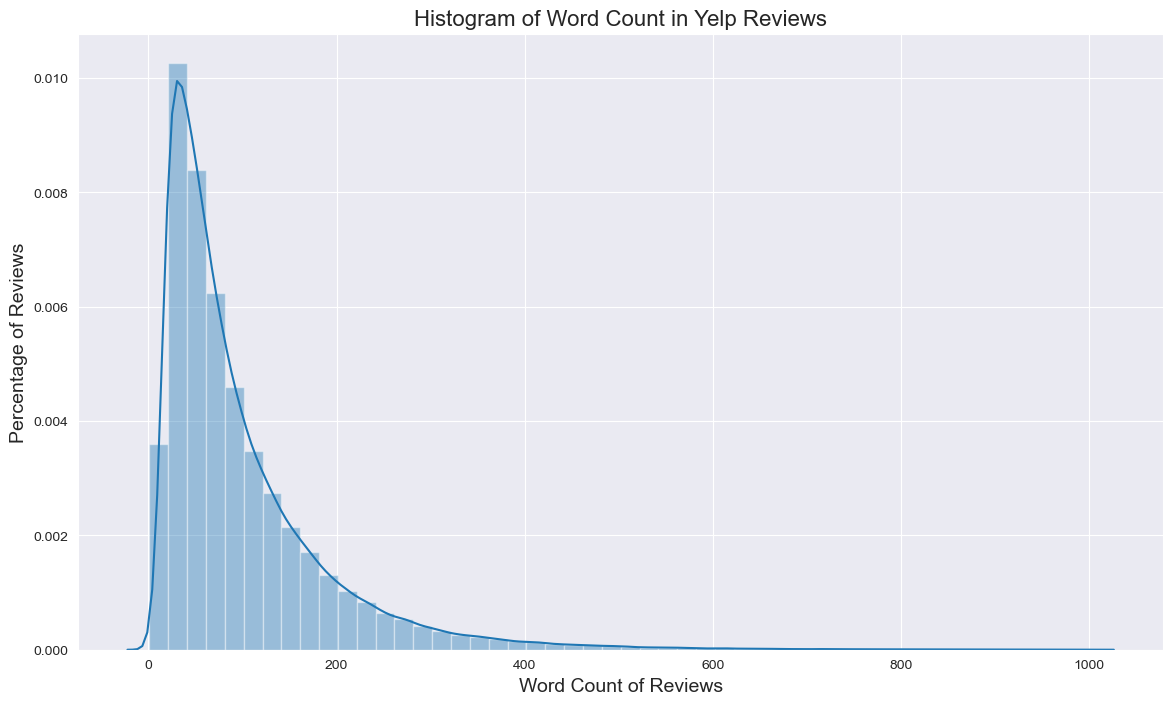

In [18]:
# Histogram of Word Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(data['word_count'])
plt.title('Histogram of Word Count in Yelp Reviews', fontsize = 16)
plt.xlabel('Word Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Reviews', fontsize=14)

C:\Users\Shree\AppData\Local\Temp/ipykernel_40604/3368460684.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['char_count'])


Text(0, 0.5, 'Percentage of Reviews')

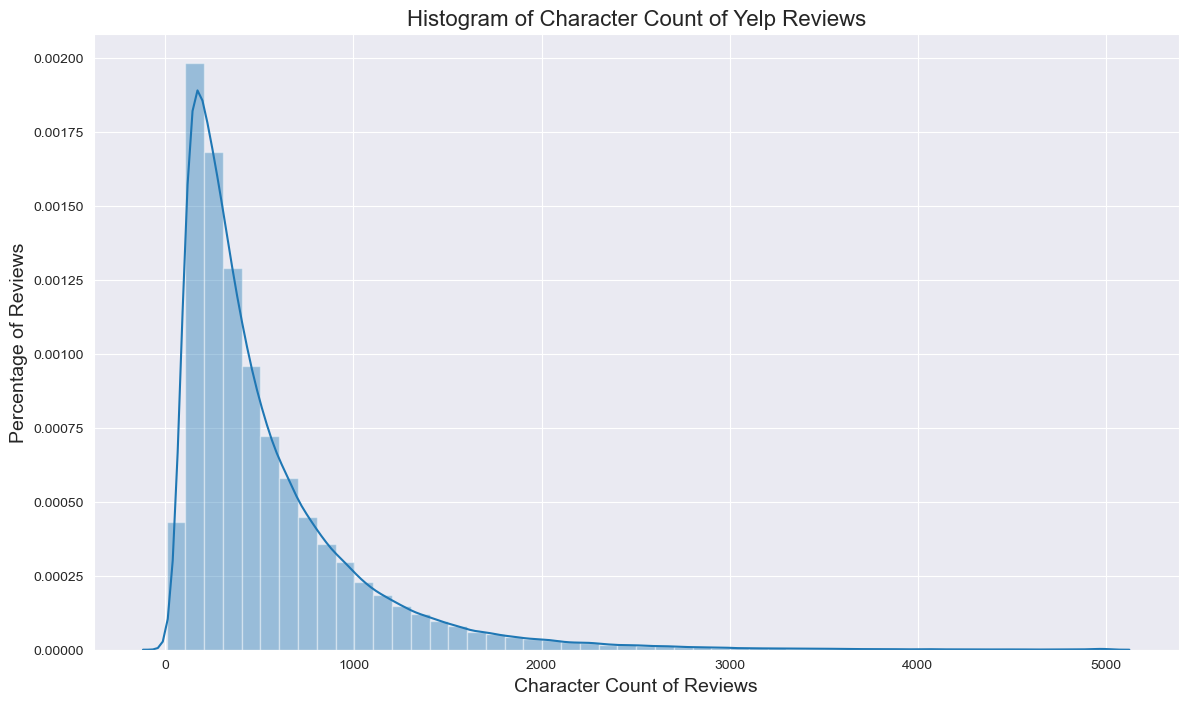

In [21]:
# Histogram of Character Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(data['char_count'])
plt.title('Histogram of Character Count of Yelp Reviews', fontsize = 16)
plt.xlabel('Character Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Reviews', fontsize=14)

C:\Users\Shree\AppData\Local\Temp/ipykernel_40604/247746616.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['stopword_count'])


Text(0, 0.5, 'Percentage of Restaurants')

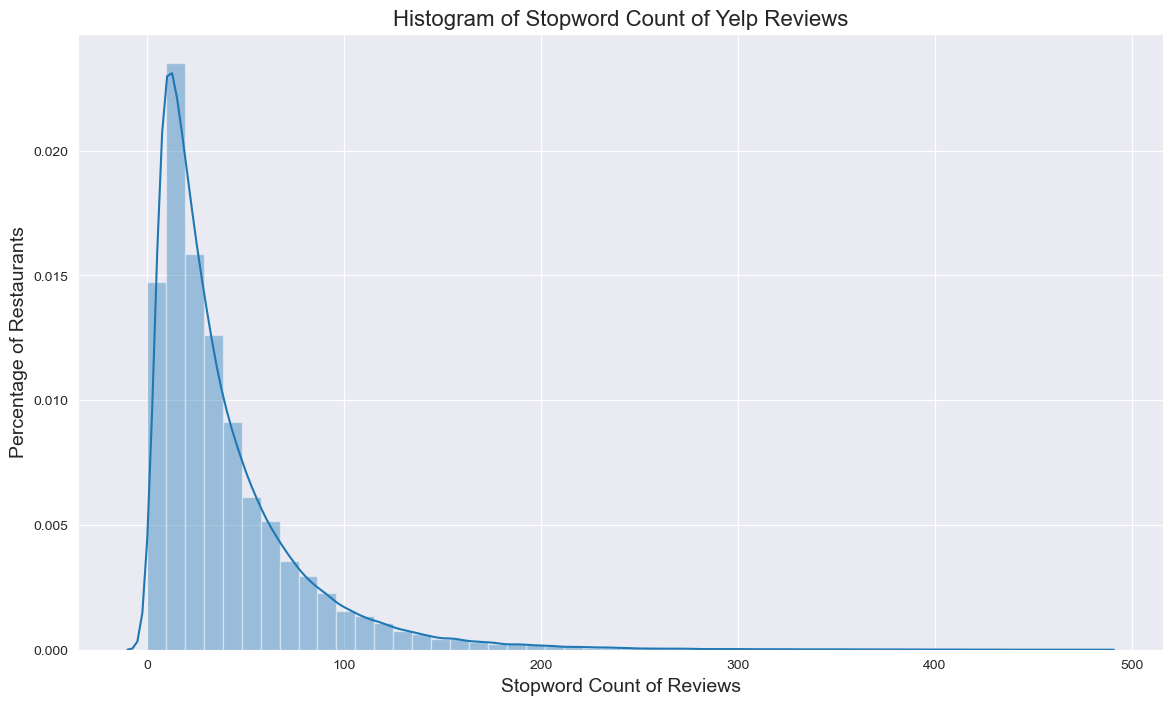

In [20]:
# Histogram of Stopword Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(data['stopword_count'])
plt.title('Histogram of Stopword Count of Yelp Reviews', fontsize = 16)
plt.xlabel('Stopword Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

In [19]:
# Average Word Length of Review for different Stars/Ratings

data.groupby('stars')['word_count'].mean()

stars
1.0     78.666667
1.5     92.825688
2.0     95.677005
2.5    107.788923
3.0     99.281448
3.5    103.235180
4.0    100.222062
4.5     95.357786
5.0     77.940805
Name: word_count, dtype: float64

In [27]:
rating_wordcount = data.groupby('stars')['word_count'].mean()
rating_wordcount = rating_wordcount.to_frame(name = 'sum').reset_index()
rating_wordcount

,stars,sum
0,1.0,78.666667
1,1.5,92.825688
2,2.0,95.677005
3,2.5,107.788923
4,3.0,99.281448
5,3.5,103.235180
6,4.0,100.222062
7,4.5,95.357786
8,5.0,77.940805


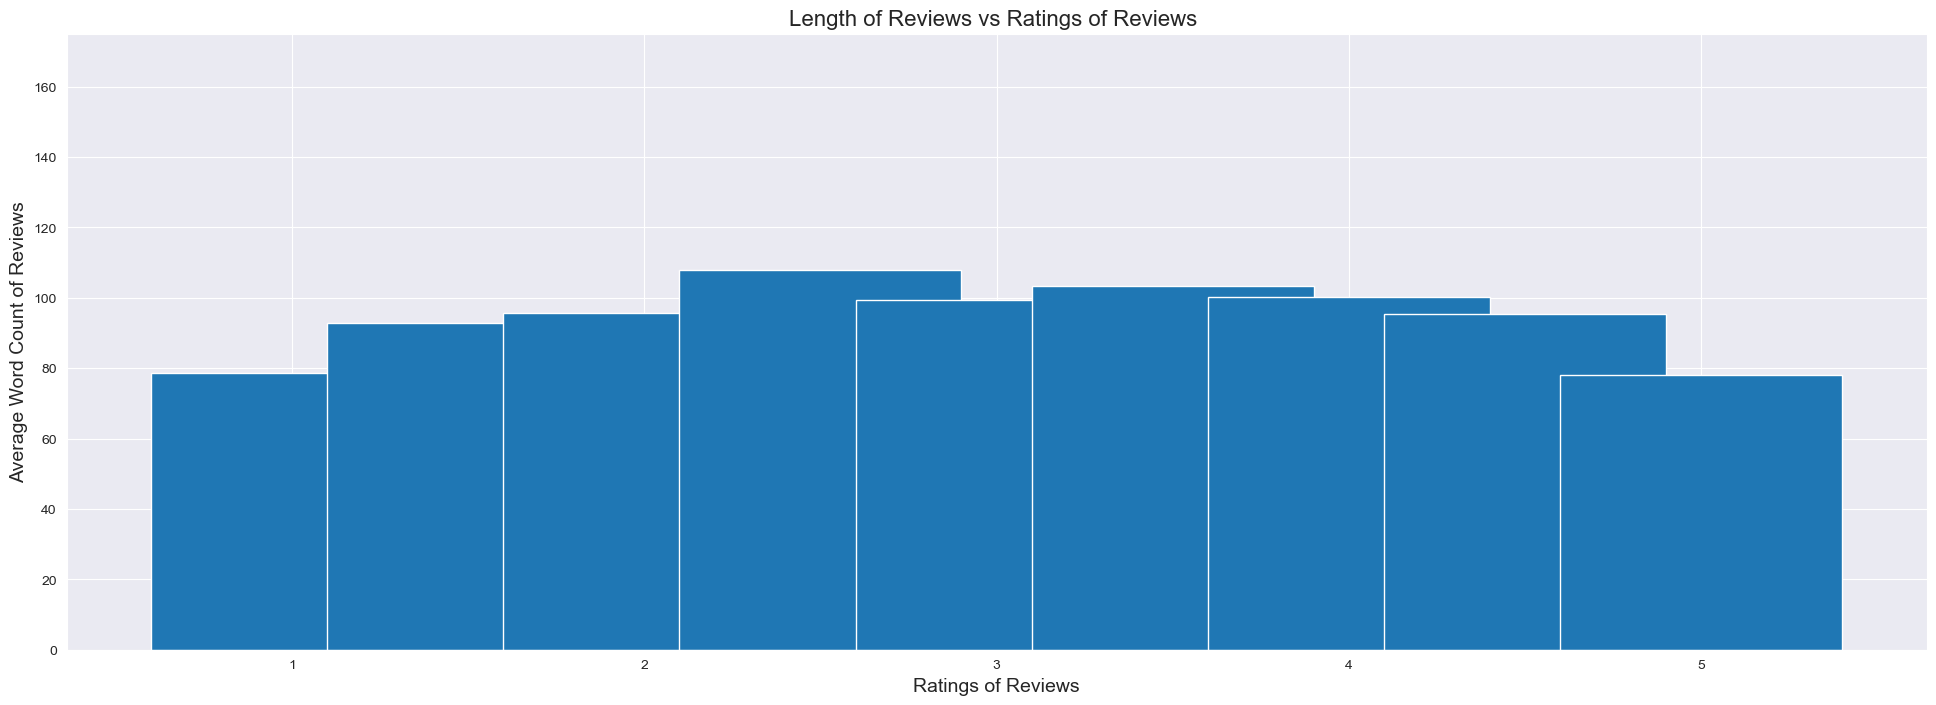

In [29]:
# Distribution of Length of Reviews vs Ratings of Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(24,8))
plt.bar(rating_wordcount['stars'],rating_wordcount['sum'])
plt.title('Length of Reviews vs Ratings of Reviews ', fontsize = 16)
plt.xlabel('Ratings of Reviews', fontsize=14)
plt.ylabel('Average Word Count of Reviews', fontsize=14)
plt.ylim((0,175))
plt.show()

#### based on the above graph we can see the average rating of 2-3 has more number of reviews. 

In [6]:
from textblob import Word

# Splitting up words in reviews

data['cleaned_text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove Punctuation

data['cleaned_text'] = data['cleaned_text'].str.replace('[^\w\s]', '')

# Remove Stopwords

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

# Lemmatizing cleaned text

data['cleaned_text'] = data['cleaned_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.head()

C:\Users\Shree\AppData\Local\Temp/ipykernel_40604/4289491767.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned_text'] = data['cleaned_text'].str.replace('[^\w\s]', '')


,Unnamed: 0,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,review_stars,text,date,year,month,time,cleaned_text
0,6,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I eat pho about 4 times a week and from a spec...,2019-04-04 16:03:00,2019,4,16:03:00,eat pho 4 time week specific restaurant tried ...
1,7,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I've been in Wesley Chapel area for about 2 ye...,2018-10-23 00:36:29,2018,10,00:36:29,ive wesley chapel area 2 year first decent bow...
2,8,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",3,Good tasted good - but I'm a bit confused as t...,2019-10-18 18:01:29,2019,10,18:01:29,good tasted good im bit confused vietnamese go...
3,9,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",4,"Ordered the chicken wings. They were hot, fre...",2019-03-29 19:09:43,2019,3,19:09:43,ordered chicken wing hot fresh super crispy dr...
4,10,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",1,How can an order of pho take an 1 hour and 15 ...,2018-12-05 17:38:51,2018,12,17:38:51,order pho take 1 hour 15 minute make thank sys...


In [7]:
#Here we are calculating polarity and subjectivity score
from textblob import TextBlob

data['polarity'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[0])
data['subjectivity'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[1])
data.head(3)

,Unnamed: 0,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,...,hours,review_stars,text,date,year,month,time,cleaned_text,polarity,subjectivity
0,6,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",...,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I eat pho about 4 times a week and from a spec...,2019-04-04 16:03:00,2019,4,16:03:00,eat pho 4 time week specific restaurant tried ...,0.385795,0.529735
1,7,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",...,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",5,I've been in Wesley Chapel area for about 2 ye...,2018-10-23 00:36:29,2018,10,00:36:29,ive wesley chapel area 2 year first decent bow...,0.110714,0.470238
2,8,Vietnamese Food Truck,NaN,tampa bay,33602,27.955269,-82.45632,4.0,10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",...,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",3,Good tasted good - but I'm a bit confused as t...,2019-10-18 18:01:29,2019,10,18:01:29,good tasted good im bit confused vietnamese go...,0.320408,0.545408


In [8]:
pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
#Calculating Vader Sentiment Analysis Score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment = data['text'].apply(lambda x: analyzer.polarity_scores(x))
data = pd.concat([data,sentiment.apply(pd.Series)],1)
data.sample(5)

C:\Users\Shree\AppData\Local\Temp/ipykernel_40604/194880109.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data,sentiment.apply(pd.Series)],1)


,Unnamed: 0,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,...,year,month,time,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
154015,599081,JoToro Kitchen & Tequila Bar,"615 Channelside Dr, Ste 114",tampa,33602,27.943271,-82.446332,3.5,192,"{'HasTV': 'True', 'OutdoorSeating': 'True', 'B...",...,2021,1,13:46:45,stopping taco sparkmans wharf area hooter used...,0.483929,0.578151,0.014,0.685,0.302,0.9956
162309,633353,Hattricks,107 S Franklin St,tampa,33602,27.944866,-82.456976,4.0,650,"{'BusinessParking': ""{'garage': False, 'street...",...,2013,12,16:05:02,group chooses come proximity camls full liquor...,0.196786,0.610357,0.074,0.755,0.171,0.9752
190335,733521,edison: food+drink lab,912 W Kennedy Blvd,tampa,33606,27.944244,-82.469306,4.0,848,"{'Alcohol': ""u'full_bar'"", 'Caters': 'True', '...",...,2016,3,03:53:44,food amazing every bite offered new experience...,0.212216,0.488636,0.000,0.856,0.144,0.6192
163148,637299,Doc B's Restaurant + Bar,"2223 N Westshore Blvd, Ste B 206",tampa,33607,27.965973,-82.520631,4.0,480,"{'RestaurantsGoodForGroups': 'True', 'Business...",...,2016,6,18:06:32,surrounded side cookie cutter chain restaurant...,0.304342,0.492507,0.000,0.814,0.186,0.9903
185683,718291,The Mediterranean Chickpea,"3217 S Macdill Ave, Ste C",tampa,33629,27.916905,-82.493890,5.0,188,"{'GoodForKids': 'True', 'WiFi': ""u'free'"", 'Wh...",...,2019,8,22:50:22,stumbled upon place definitely planned allah c...,0.492000,0.708000,0.082,0.535,0.383,0.8781


C:\Users\Shree\AppData\Local\Temp/ipykernel_40604/1134259074.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['compound'])


Text(0, 0.5, 'Percentage of Restaurants')

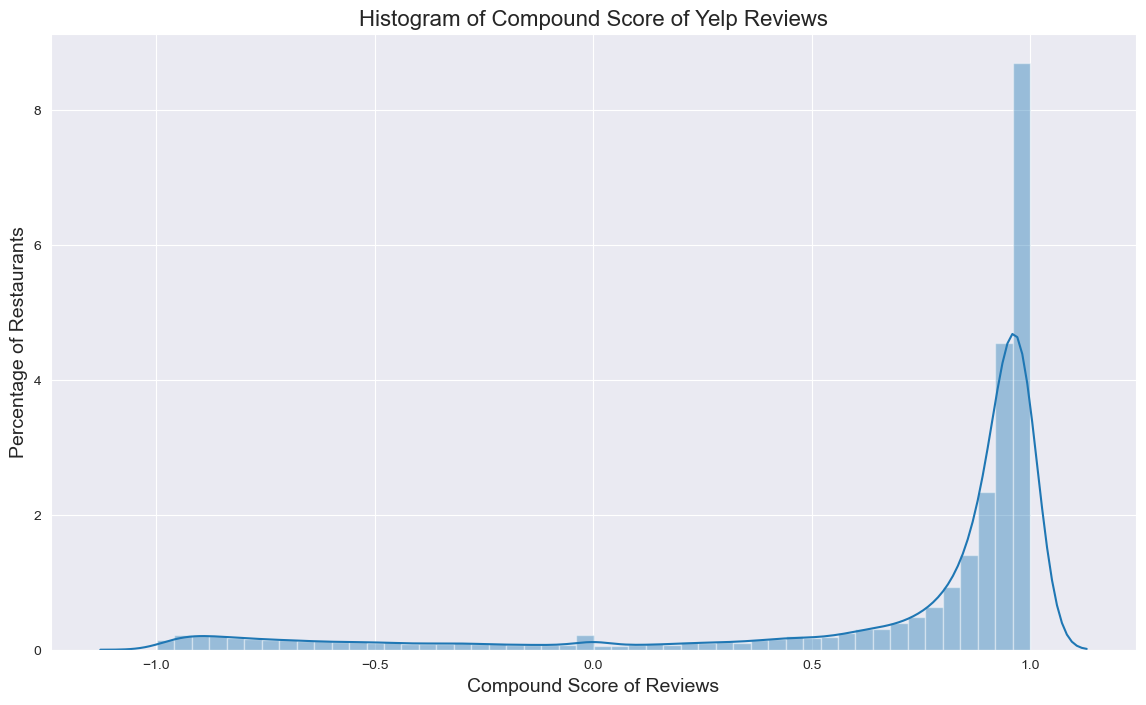

In [10]:
# Histogram of Compound Score of Yelp Reviews
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(data['compound'])
plt.title('Histogram of Compound Score of Yelp Reviews', fontsize = 16)
plt.xlabel('Compound Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

C:\Users\Shree\AppData\Local\Temp/ipykernel_40604/3593566884.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['polarity'])


Text(0, 0.5, 'Percentage of Restaurants')

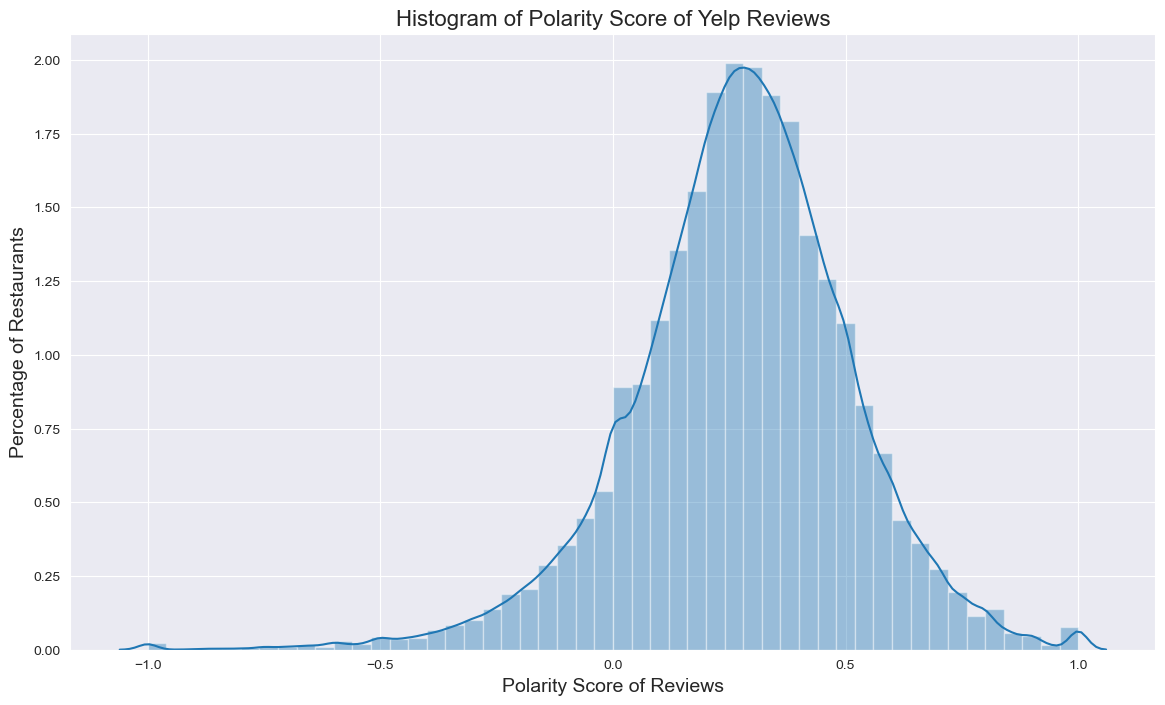

In [11]:
# Histogram of Polarity Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(data['polarity'])
plt.title('Histogram of Polarity Score of Yelp Reviews', fontsize = 16)
plt.xlabel('Polarity Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

C:\Users\Shree\AppData\Local\Temp/ipykernel_40604/1025491549.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['subjectivity'])


Text(0, 0.5, 'Percentage of Restaurants')

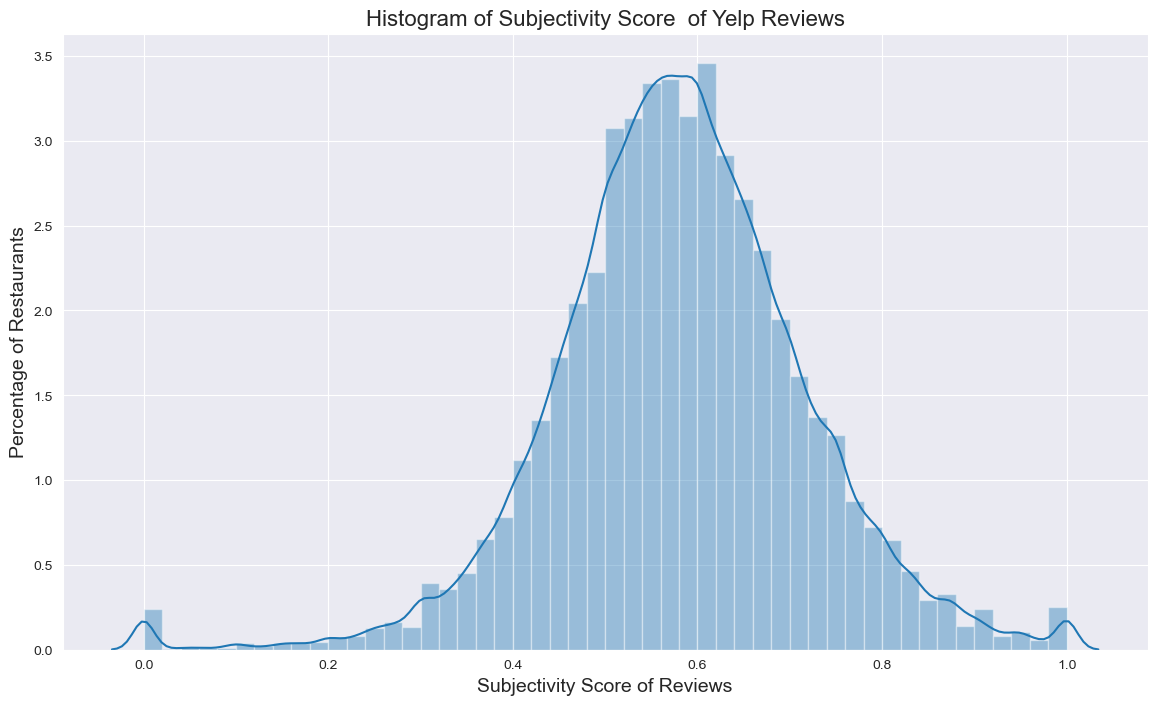

In [12]:
# Histogram of Subjectivity Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(data['subjectivity'])
plt.title('Histogram of Subjectivity Score  of Yelp Reviews', fontsize = 16)
plt.xlabel('Subjectivity Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

In [13]:
data.shape

(242181, 25)

In [14]:
data.to_csv("sentiment_reviews.csv")